In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv')
df["date"] = pd.to_datetime(df["date"])
df = df.set_index('date')
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [5]:
df = df[(df['value']>=df['value'].quantile(0.025)) & (df['value']<=df['value'].quantile(0.975))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


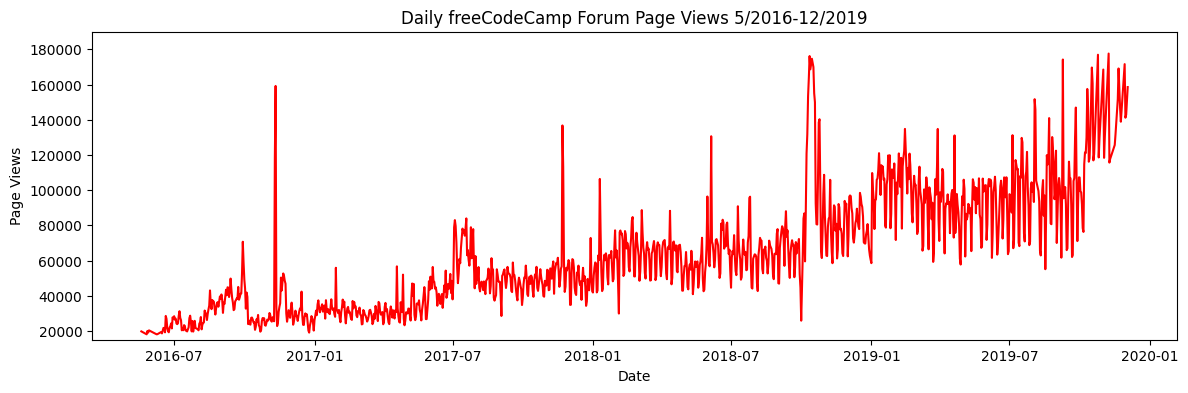

In [134]:
def draw_line_plot():
    df_line = df.copy()
    df_line = df_line.reset_index()
    x = df_line['date']
    y = df_line['value']
    fig, axes = plt.subplots(figsize=(14,4))
    axes.set_xlabel('Date')
    axes.set_ylabel('Page Views')
    axes.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    axes.set_ylim(bottom=15000, top=190000)
    axes.plot(x, y, color='red')
draw_line_plot()

C:\Users\youse\AppData\Local\Temp\ipykernel_4180\2838323003.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy['year'] = copy.index.year
C:\Users\youse\AppData\Local\Temp\ipykernel_4180\2838323003.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy['month'] = copy.index.month_name()


<AxesSubplot: xlabel='year', ylabel='Average page views'>

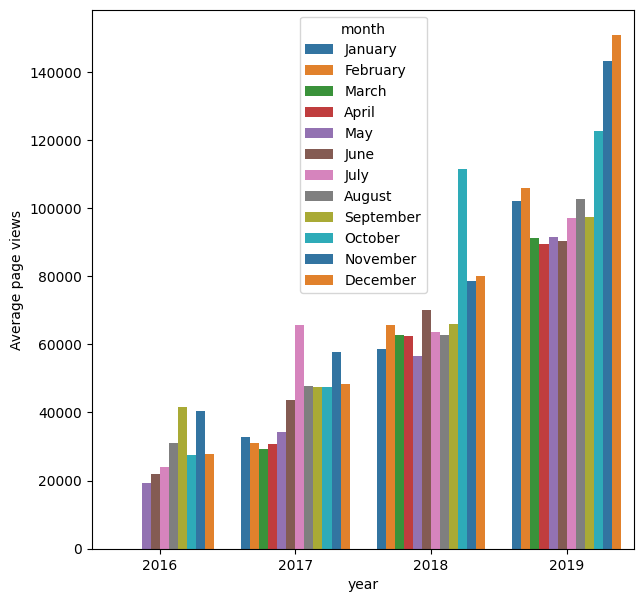

In [88]:
df_bar = df.df_bar()
df_bar['year'] = df_bar.index.year
df_bar['month'] = df_bar.index.month_name()
df_bar = pd.DataFrame(df_bar.groupby(['year', 'month'], sort=False)['value'].mean().astype(int).round())
df_bar = df_bar.rename(columns={"value": "Average page views"})
df_bar = df_bar.reset_index()
fig, axes = plt.subplots(figsize=(7,7))
axes.set_xlabel('Years')
axes.set_ylabel('Average Page Views')
hueorder = ['January', 'February', 'March', 'April', 'May', 
'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.barplot(data=df_bar, x='year', y='Average page views', hue='month', hue_order=hueorder, palette='tab10')

<AxesSubplot: title={'center': 'Month-wise Box Plot (Seasonality)'}, xlabel='month', ylabel='value'>

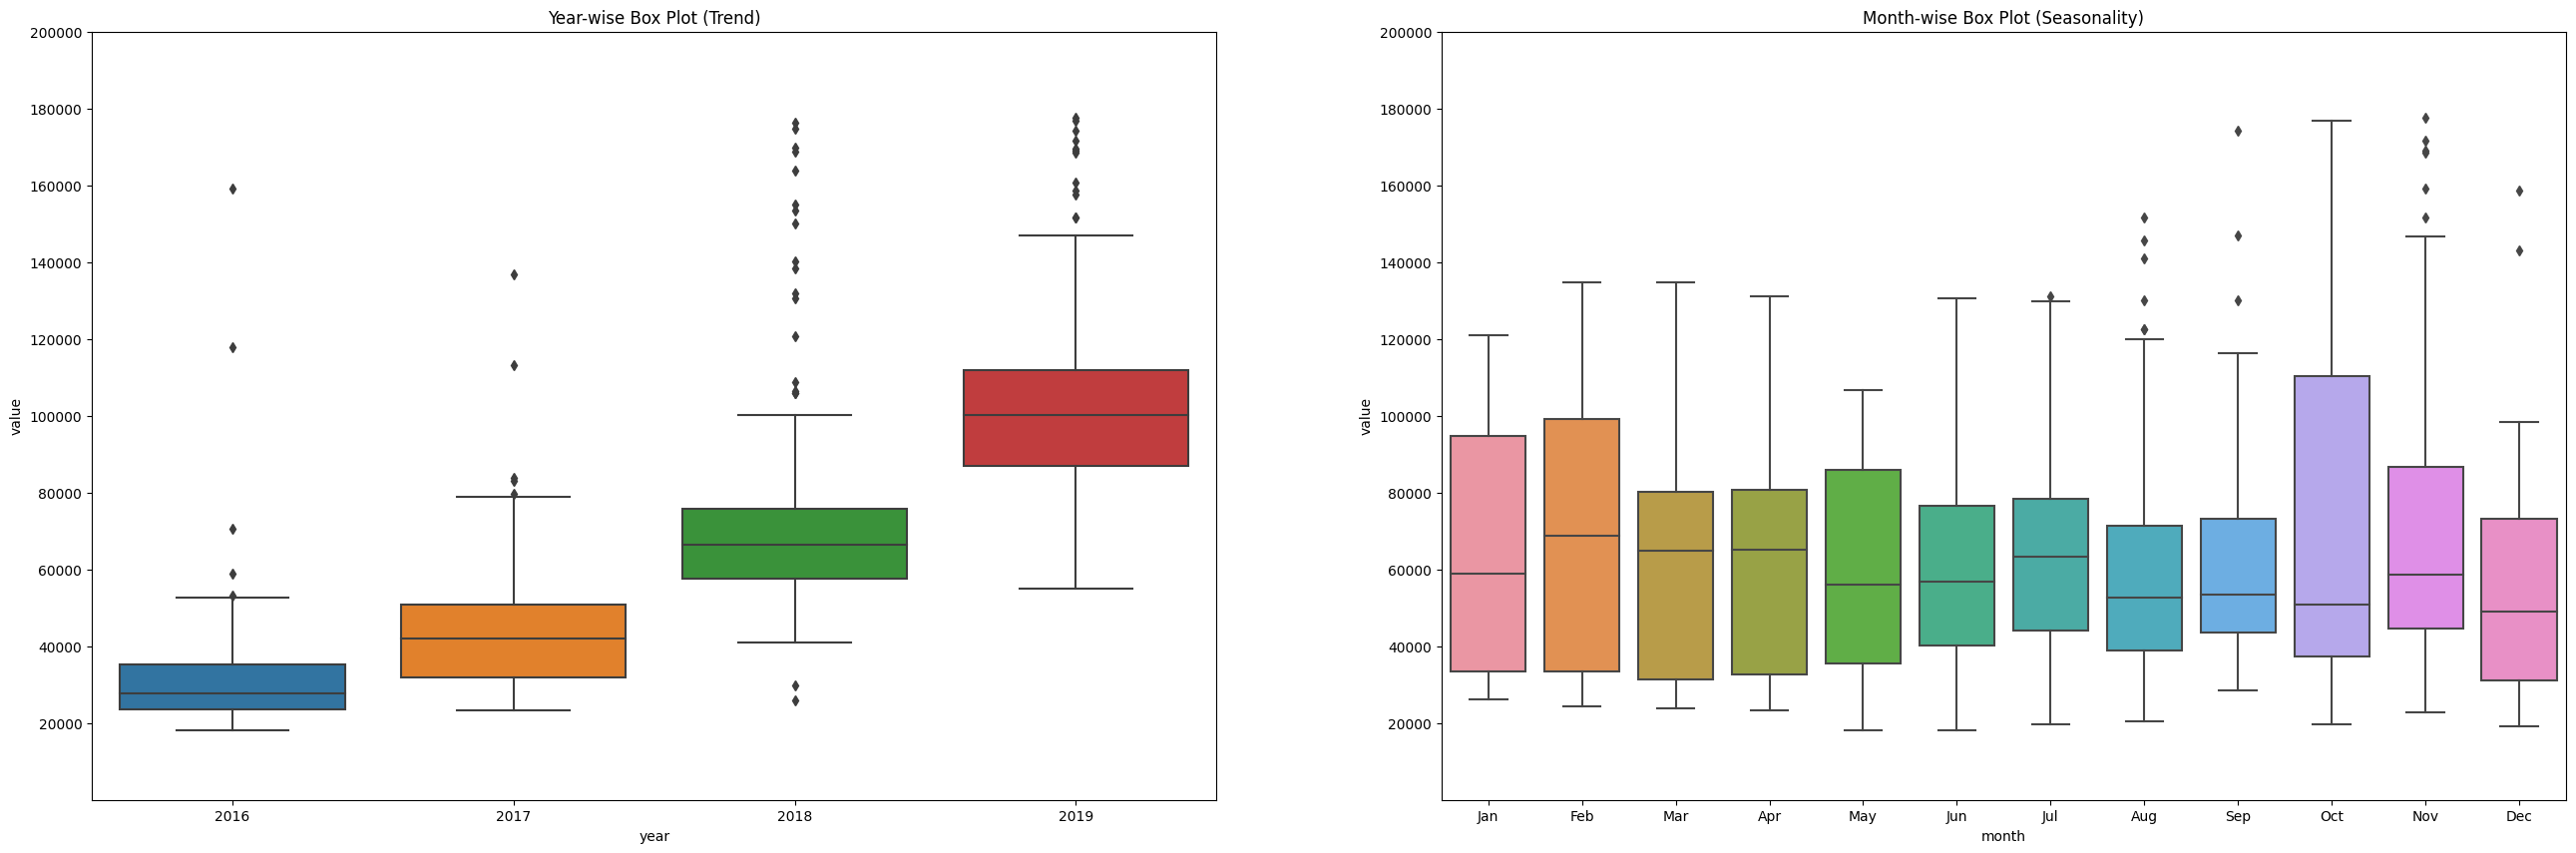

In [135]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(32, 10))
ax1.set_title('Year-wise Box Plot (Trend)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Page views')
ax2.set_title('Month-wise Box Plot (Seasonality)')
ax2.set_xlabel('Month')
ax2.set_ylabel('Page views')
ax1.set_ylim(top=200000)
ax2.set_ylim(top=200000)
ax1.set_yticks([20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000])
ax2.set_yticks([20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000])
sns.boxplot(data=df_box, x='year', y='value', ax=ax1)
sns.boxplot(data=df_box, x='month', y='value', ax=ax2, order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 
'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])